In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

import koreanize_matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.1 MB/s eta 0:00:00


출퇴근시간에 승하차인원을 비교하기 위해 시간을 설정했습니다.

In [ ]:
subway=pd.read_csv('/content/drive/MyDrive/202411지하철이용정보.csv',encoding='EUC_KR')
subway

사용월  호선명 지하철역  07시-08시 승차인원  07시-08시 하차인원  08시-09시 승차인원  08시-09시 하차인원  \
0    202411  1호선  동대문         16584         11007         21998         19645   
1    202411  1호선  동묘앞          9119          9155         14269         21391   
2    202411  1호선  서울역         42622        113969         78886        238645   
3    202411  1호선   시청          7955         73183         10875        193991   
4    202411  1호선  신설동         22551         25333         34146         55123   
..      ...  ...  ...           ...           ...           ...           ...   
616  202411  중앙선   원덕           980           375          1066           600   
617  202411  중앙선   중랑         22951          3325         21615          6927   
618  202411  중앙선   지평           407           241             1             0   
619  202411  중앙선   팔당          1308          1770          1194          2993   
620  202411  중앙선   회기         59667         32963         78921         61396   

     17시-18시 승차인원  17시-18시 하차인원  18시-19시 승차인원  18시-19시 하차인원  
0           29192         24138         24800         24307  
1           33623         14964         19743         12091  
2          201177        101651        236216        104572  
3          108920         36193        170428         30085  
4           44203         25913         53672         32773  
..            ...           ...           ...           ...  
616           655          1118           434           912  
617          7863         15953          7446         21923  
618           164           225            34           202  
619          2665          1734          2720          1426  
620         77081         59657         58872         83550  

[621 rows x 11 columns]

In [ ]:
subway['07시-09시 승차인원'] = subway['07시-08시 승차인원']+subway['08시-09시 승차인원']
subway['07시-09시 하차인원'] = subway['07시-08시 하차인원']+subway['08시-09시 하차인원']
subway['17시-19시 승차인원'] = subway['17시-18시 승차인원']+subway['17시-18시 승차인원']
subway['17시-19시 하차인원'] = subway['17시-18시 하차인원']+subway['18시-19시 하차인원']
subway

사용월  호선명 지하철역  07시-08시 승차인원  07시-08시 하차인원  08시-09시 승차인원  08시-09시 하차인원  \
0    202411  1호선  동대문         16584         11007         21998         19645   
1    202411  1호선  동묘앞          9119          9155         14269         21391   
2    202411  1호선  서울역         42622        113969         78886        238645   
3    202411  1호선   시청          7955         73183         10875        193991   
4    202411  1호선  신설동         22551         25333         34146         55123   
..      ...  ...  ...           ...           ...           ...           ...   
616  202411  중앙선   원덕           980           375          1066           600   
617  202411  중앙선   중랑         22951          3325         21615          6927   
618  202411  중앙선   지평           407           241             1             0   
619  202411  중앙선   팔당          1308          1770          1194          2993   
620  202411  중앙선   회기         59667         32963         78921         61396   

     17시-18시 승차인원  17시-18시 하차인원  18시-19시 승차인원  18시-19시 하차인원  07시-09시 승차인원  \
0           29192         24138         24800         24307         38582   
1           33623         14964         19743         12091         23388   
2          201177        101651        236216        104572        121508   
3          108920         36193        170428         30085         18830   
4           44203         25913         53672         32773         56697   
..            ...           ...           ...           ...           ...   
616           655          1118           434           912          2046   
617          7863         15953          7446         21923         44566   
618           164           225            34           202           408   
619          2665          1734          2720          1426          2502   
620         77081         59657         58872         83550        138588   

     07시-09시 하차인원  17시-19시 승차인원  17시-19시 하차인원  
0           30652         58384         48445  
1           30546         67246         27055  
2          352614        402354        206223  
3          267174        217840         66278  
4           80456         88406         58686  
..            ...           ...           ...  
616           975          1310          2030  
617         10252         15726         37876  
618           241           328           427  
619          4763          5330          3160  
620         94359        154162        143207  

[621 rows x 15 columns]

In [ ]:
subway.drop(columns=['07시-08시 승차인원','07시-08시 하차인원','08시-09시 승차인원','08시-09시 하차인원','17시-18시 승차인원','17시-18시 하차인원','18시-19시 승차인원','18시-19시 하차인원'], axis=1, inplace= True)


출퇴근 시간에 승차 인원과 하차인원의 차이를 비교하기위해 승차인원에서 하차인원을 빼 그 수가 양수면 승차인원이 더 많은 것이고, 음수면 하차인원이 더 많은 것으로 정의했습니다.

In [ ]:
subway['07시-09시 승차-하차인원']=subway['07시-09시 승차인원']-subway['07시-09시 하차인원']
subway['17시-19시 승차-하차인원']=subway['17시-19시 승차인원']-subway['17시-19시 하차인원']
subway

사용월  호선명 지하철역  07시-09시 승차인원  07시-09시 하차인원  17시-19시 승차인원  17시-19시 하차인원  \
0    202411  1호선  동대문         38582         30652         58384         48445   
1    202411  1호선  동묘앞         23388         30546         67246         27055   
2    202411  1호선  서울역        121508        352614        402354        206223   
3    202411  1호선   시청         18830        267174        217840         66278   
4    202411  1호선  신설동         56697         80456         88406         58686   
..      ...  ...  ...           ...           ...           ...           ...   
616  202411  중앙선   원덕          2046           975          1310          2030   
617  202411  중앙선   중랑         44566         10252         15726         37876   
618  202411  중앙선   지평           408           241           328           427   
619  202411  중앙선   팔당          2502          4763          5330          3160   
620  202411  중앙선   회기        138588         94359        154162        143207   

     07시-09시 승차-하차인원  17시-19시 승차-하차인원  
0               7930             9939  
1              -7158            40191  
2            -231106           196131  
3            -248344           151562  
4             -23759            29720  
..               ...              ...  
616             1071             -720  
617            34314           -22150  
618              167              -99  
619            -2261             2170  
620            44229            10955  

[621 rows x 9 columns]

In [ ]:
subway.commute=subway.sort_values('07시-09시 승차-하차인원',ascending=True)
subway.commute.reset_index(inplace=True)
subway.commute

<ipython-input-11-0dfc1874d2a3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subway.commute=subway.sort_values('07시-09시 승차-하차인원',ascending=True)


index     사용월  호선명         지하철역  07시-09시 승차인원  07시-09시 하차인원  \
0       43  202411  2호선           역삼         44889        525252   
1      215  202411  7호선      가산디지털단지         54614        522996   
2       50  202411  2호선        을지로입구         30007        471730   
3       26  202411  2호선     삼성(무역센터)         36921        468680   
4        6  202411  1호선           종각         18290        377499   
..     ...     ...  ...          ...           ...           ...   
616     28  202411  2호선  서울대입구(관악구청)        310302         97880   
617    112  202411  4호선           쌍문        260085         46063   
618    175  202411  5호선           화곡        265232         50263   
619    133  202411  5호선          까치산        273741         33361   
620     37  202411  2호선           신림        457834         74366   

     17시-19시 승차인원  17시-19시 하차인원  07시-09시 승차-하차인원  17시-19시 승차-하차인원  
0          478926        119406          -480363           359520  
1          446248         67469          -468382           378779  
2          377416        165684          -441723           211732  
3          488818        140447          -431759           348371  
4          329962        103798          -359209           226164  
..            ...           ...              ...              ...  
616        176550        287906           212422          -111356  
617         80904        185806           214022          -104902  
618         81772        200951           214969          -119179  
619         68072        202118           240380          -134046  
620        159794        370596           383468          -210802  

[621 rows x 10 columns]

In [ ]:
subway.out=subway.sort_values('17시-19시 승차-하차인원',ascending=True)
subway.out.reset_index(inplace=True)
subway.out

<ipython-input-12-ac925328a385>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subway.out=subway.sort_values('17시-19시 승차-하차인원',ascending=True)


index     사용월  호선명      지하철역  07시-09시 승차인원  07시-09시 하차인원  17시-19시 승차인원  \
0       37  202411  2호선        신림        457834         74366        159794   
1       25  202411  2호선        사당        189813        129127        171536   
2      133  202411  5호선       까치산        273741         33361         68072   
3      175  202411  5호선        화곡        265232         50263         81772   
4       83  202411  3호선       연신내        261942         57777        105952   
..     ...     ...  ...       ...           ...           ...           ...   
616    298  202411  9호선       여의도         21629        338556        355084   
617     30  202411  2호선        선릉         63227        412330        447380   
618     26  202411  2호선  삼성(무역센터)         36921        468680        488818   
619     43  202411  2호선        역삼         44889        525252        478926   
620    215  202411  7호선   가산디지털단지         54614        522996        446248   

     17시-19시 하차인원  07시-09시 승차-하차인원  17시-19시 승차-하차인원  
0          370596           383468          -210802  
1          331610            60686          -160074  
2          202118           240380          -134046  
3          200951           214969          -119179  
4          222769           204165          -116817  
..            ...              ...              ...  
616         72353          -316927           282731  
617        129282          -349103           318098  
618        140447          -431759           348371  
619        119406          -480363           359520  
620         67469          -468382           378779  

[621 rows x 10 columns]

출근시간에 승차인원이 많은 역은 퇴근시간에 대체로 퇴근시간에 승차인원이 하차인원보다 많다는 것을 알 수 있습니다.

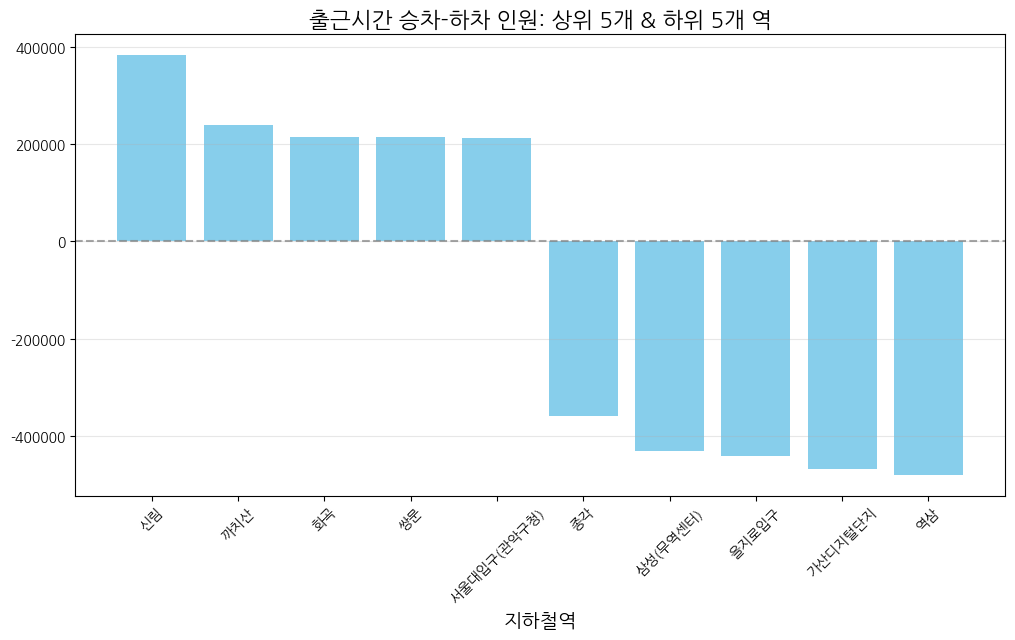

In [ ]:
top_5 = subway.nlargest(5, '07시-09시 승차-하차인원')
bottom_5 = subway.nsmallest(5, '07시-09시 승차-하차인원')

comparison_df = pd.concat([top_5, bottom_5])

plt.figure(figsize=(12, 6))
comparison_df_sorted = comparison_df.sort_values('07시-09시 승차-하차인원', ascending=False)

plt.bar(comparison_df_sorted['지하철역'], comparison_df_sorted['07시-09시 승차-하차인원'], color=['skyblue'])
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('출근시간 승차-하차 인원: 상위 5개 & 하위 5개 역', fontsize=16)
plt.xlabel('지하철역', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

퇴근시간인 17-19시에 승차인원이 더 많으면 주변에 상업지구가 발달되어 있고, 하차 인원이 더 많으면 주변에 거주지가 많이 분포하여 있을거라 예상하여 진행하였습니다.


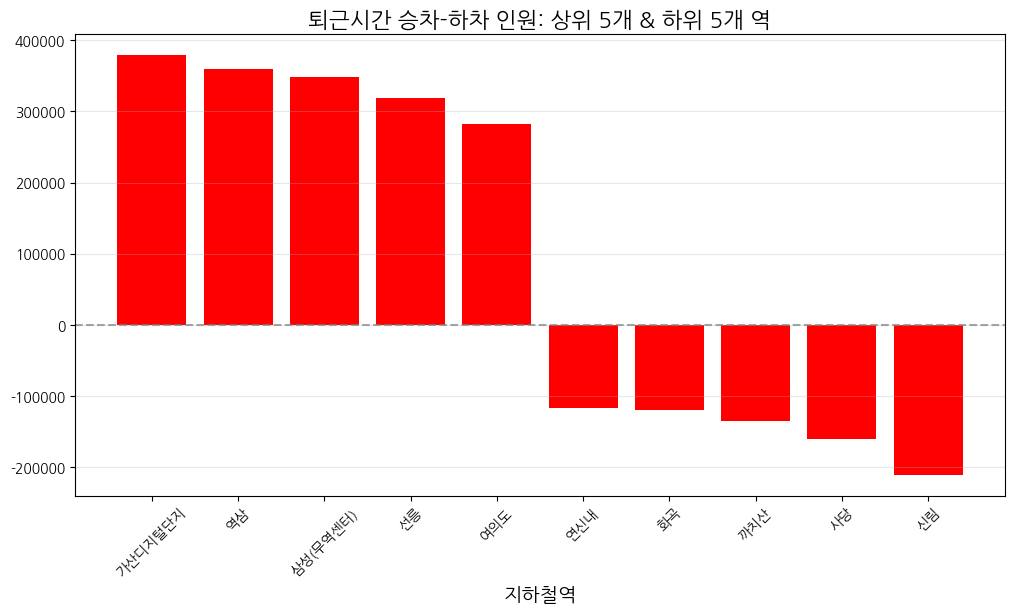

In [ ]:
top_5_17_19 = subway.nlargest(5, '17시-19시 승차-하차인원')
bottom_5_17_19 = subway.nsmallest(5, '17시-19시 승차-하차인원')

comparison_df_17_19 = pd.concat([top_5_17_19, bottom_5_17_19])

plt.figure(figsize=(12, 6))
comparison_df_sorted_17_19 = comparison_df_17_19.sort_values('17시-19시 승차-하차인원', ascending=False)

plt.bar(comparison_df_sorted_17_19['지하철역'], comparison_df_sorted_17_19['17시-19시 승차-하차인원'], color='red')
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('퇴근시간 승차-하차 인원: 상위 5개 & 하위 5개 역', fontsize=16)
plt.xlabel('지하철역', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


07-09시, 17-19시 모두 승차인원-하차인원으로 정리하여 그래프를 그렸습니다. 양수인경우 승차인원이 더 많은 것이고, 음수로 나타나는 경우 하차인원이 더 많습니다.

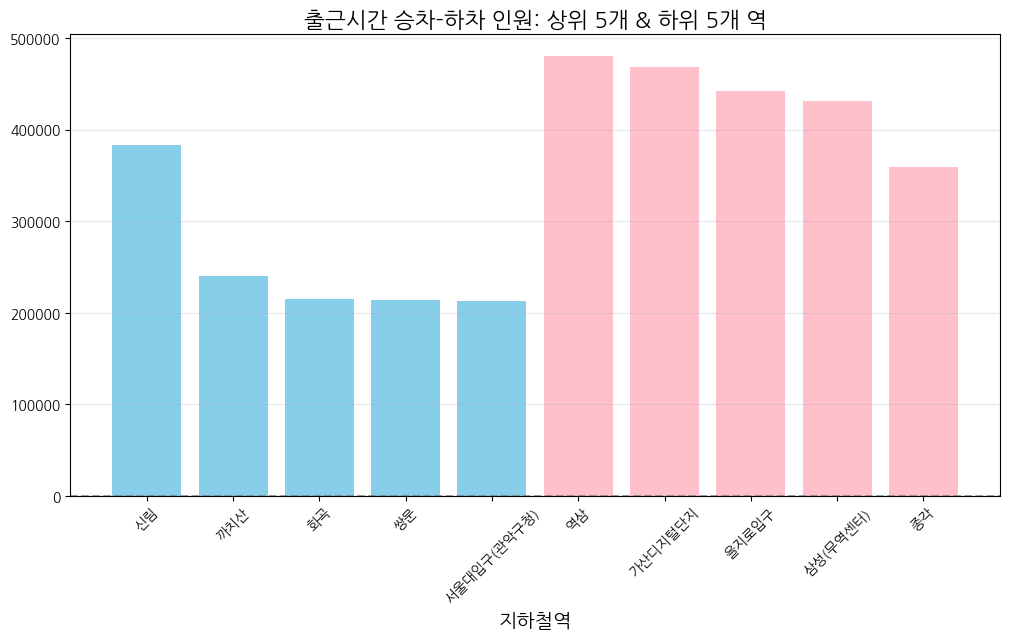

In [ ]:

top_5 = subway.nlargest(5, '07시-09시 승차-하차인원')

bottom_5 = subway.nsmallest(5, '07시-09시 승차-하차인원').copy()
bottom_5['07시-09시 승차-하차인원'] = -bottom_5['07시-09시 승차-하차인원']

comparison_df = pd.concat([top_5, bottom_5])
colors = ['skyblue'] * len(top_5) + ['pink'] * len(bottom_5)
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['지하철역'], comparison_df['07시-09시 승차-하차인원'], color=colors)
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('출근시간 승차-하차 인원: 상위 5개 & 하위 5개 역', fontsize=16)
plt.xlabel('지하철역', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()


 출근시간대 승차 인원이 많은 역과 하차인원이 많은역 상위 5개씩 나열하고 인원수 이므로 하위 5개 그래프에 -를 취해서 그래프를 나타냈습니다.

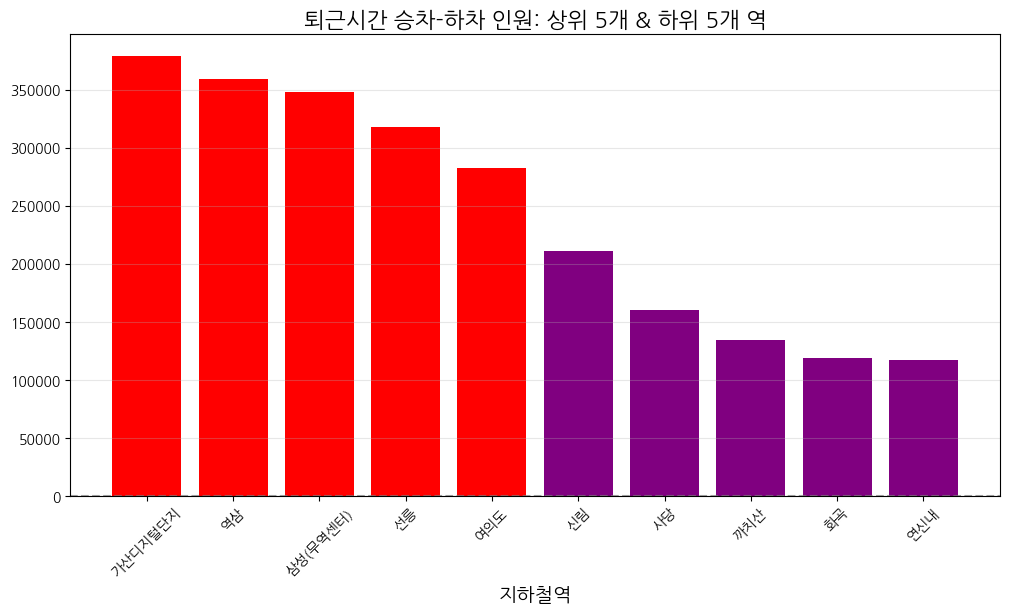

In [ ]:
top_5_17_19 = subway.nlargest(5, '17시-19시 승차-하차인원')

bottom_5_17_19 = subway.nsmallest(5, '17시-19시 승차-하차인원').copy()
bottom_5_17_19['17시-19시 승차-하차인원'] = -bottom_5_17_19['17시-19시 승차-하차인원']

comparison_df_17_19 = pd.concat([top_5_17_19, bottom_5_17_19])

colors_17_19 = ['red'] * len(top_5_17_19) + ['purple'] * len(bottom_5_17_19)
plt.figure(figsize=(12, 6))
plt.bar(comparison_df_17_19['지하철역'], comparison_df_17_19['17시-19시 승차-하차인원'], color=colors_17_19)
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('퇴근시간 승차-하차 인원: 상위 5개 & 하위 5개 역', fontsize=16)
plt.xlabel('지하철역', fontsize=14)

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()


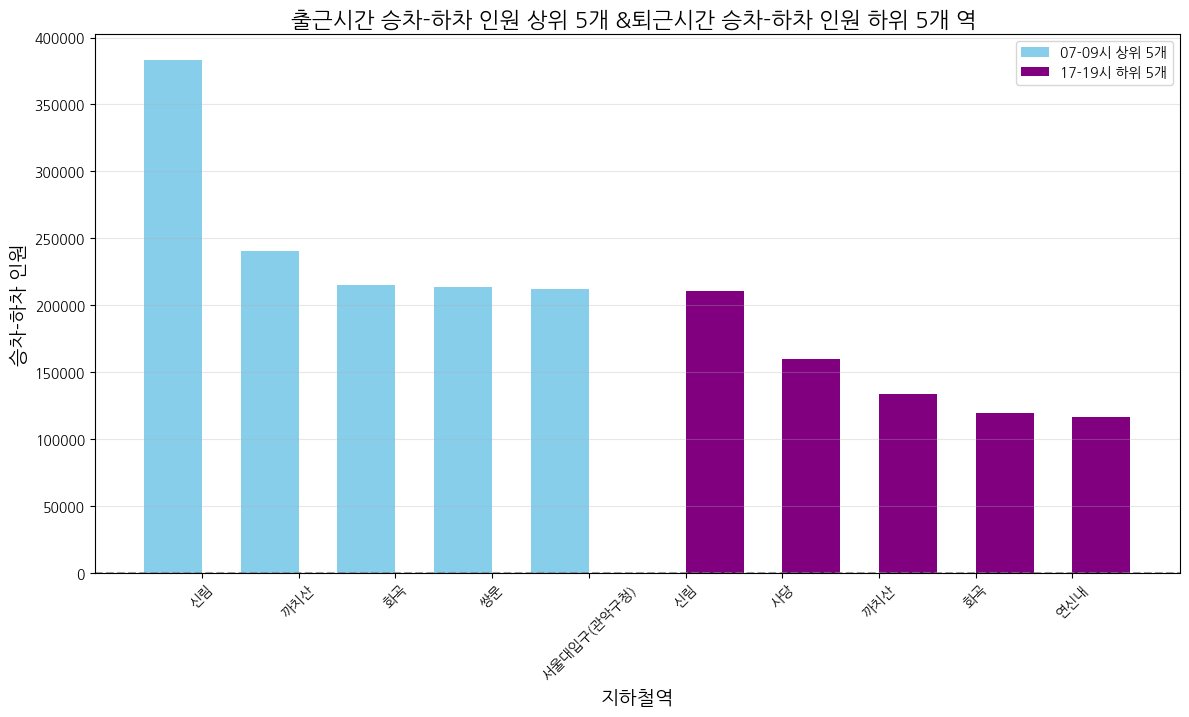

In [ ]:
bar_width = 0.6  # Increased width for thicker bars
x_indices = np.arange(len(top_5) + len(bottom_5_17_19))

top_5_indices = x_indices[:len(top_5)]
bottom_5_17_19_indices = x_indices[len(top_5):]

plt.figure(figsize=(14, 7))

plt.bar(top_5_indices, top_5['07시-09시 승차-하차인원'], width=bar_width, color='skyblue', label='07-09시 상위 5개')
plt.bar(bottom_5_17_19_indices + bar_width, bottom_5_17_19['17시-19시 승차-하차인원'], width=bar_width, color='purple', label='17-19시 하위 5개')

combined_labels = list(top_5['지하철역']) + list(bottom_5_17_19['지하철역'])
plt.xticks(ticks=x_indices + bar_width / 2, labels=combined_labels, rotation=45)

plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('출근시간 승차-하차 인원 상위 5개 &퇴근시간 승차-하차 인원 하위 5개 역 ', fontsize=16)
plt.xlabel('지하철역', fontsize=14)
plt.ylabel('승차-하차 인원', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

위에 그래프는 출근시간대에 승차인원이 더많은 그래프와 퇴근시간대에 하차인원이 더많은 그래프를 나열해놓았습니다. 예상한 바와 같이 출근시간대에 하차인원이 많은 경우 퇴근시간대에 승차인원이 많았습니다.

출근시간 승차인원이많고, 퇴근시간 하차인원이 많은 역들은 주변에 오피스 및 상업시설이  분포하여 있는 것을 확인하였습니다.

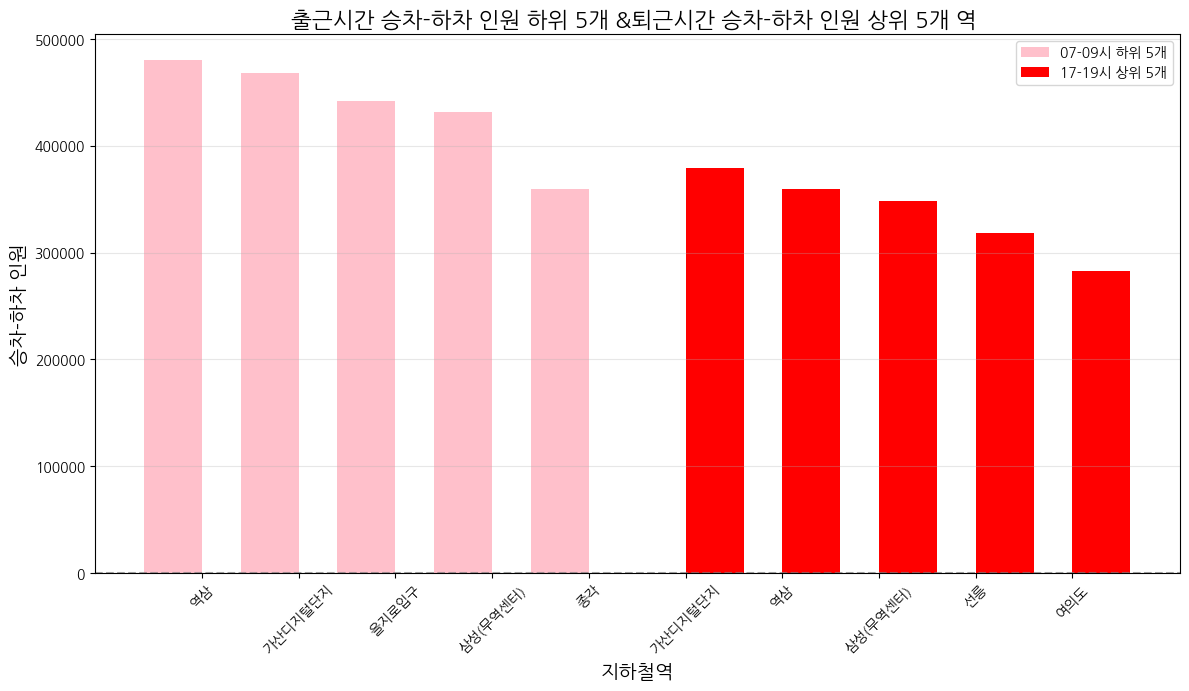

In [ ]:
bottom_5_morning = subway.nsmallest(5, '07시-09시 승차-하차인원').copy()
bottom_5_morning['07시-09시 승차-하차인원'] = -bottom_5_morning['07시-09시 승차-하차인원']

top_5_evening = subway.nlargest(5, '17시-19시 승차-하차인원')

x_indices = np.arange(len(bottom_5_morning) + len(top_5_evening))
bar_width = 0.6

bottom_5_morning_indices = x_indices[:len(bottom_5_morning)]
top_5_evening_indices = x_indices[len(bottom_5_morning):]

plt.figure(figsize=(14, 7))

plt.bar(bottom_5_morning_indices, bottom_5_morning['07시-09시 승차-하차인원'], width=bar_width, color='pink', label='07-09시 하위 5개')
plt.bar(top_5_evening_indices + bar_width, top_5_evening['17시-19시 승차-하차인원'], width=bar_width, color='red', label='17-19시 상위 5개')

combined_labels = list(bottom_5_morning['지하철역']) + list(top_5_evening['지하철역'])
plt.xticks(ticks=x_indices + bar_width / 2, labels=combined_labels, rotation=45)

plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.title('출근시간 승차-하차 인원 하위 5개 &퇴근시간 승차-하차 인원 상위 5개 역 ', fontsize=16)
plt.xlabel('지하철역', fontsize=14)
plt.ylabel('승차-하차 인원', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


위에 그래프는 퇴근시간대에 승차인원이 더많은 그래프와 출근시간대에 하차인원이 더많은 그래프를 나열해놓았습니다. 예상한 바와 같이 위와 같은 양상을 띄었습니다.

출근시간 하차인원이많고, 퇴근시간 승차인원이 많은 역들은 주변에 업부지구 및 상업지구가 분포하여 있는 것을 확인하였습니다.



다음 두 그래프를 분석한 결과 출퇴근시간대 승하차인원수와 역 주변 상권의 분포는 상관관계가 있다는 것을 확인할 수있었습니다.